In [1]:
from AlexNet import AlexNet
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from DataModel import FashionMnist,collate_fn
import torch
%matplotlib inline

test_img_path='D:/datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte'
test_label_path='D:/datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte'

device='cuda' if torch.cuda.is_available() else 'cpu'
weights_path='D:/ModelWeights/CV/AlexNet/epoch10.bin'
net=AlexNet()

test_data=FashionMnist(test_img_path,test_label_path)
test_iter=DataLoader(test_data,batch_size=64,shuffle=True,collate_fn=collate_fn)


net=net.to(device)
net.load_state_dict(torch.load(weights_path,map_location=device))
net.eval()

AlexNet(
  (net): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): Linear(in_features=9216, out_features=4096, bias=True)
    (15): ReLU()
    (16): Dropout(p=0.5, inplace=False)
    (17): Linear(in_features=4096, out_features=1000, bias=True)
    (18): ReLU()
    (19): Dropout(p=0

In [2]:
plt.figure(figsize=(10,6))
device

'cuda'

<Figure size 720x432 with 0 Axes>

In [3]:


def plot(imgs,labels,predict_labels,row,column):
    plt.figure(figsize=(10,6))
    for i in range(row*column):
        plt.subplot(row,column,i+1)
        plt.title(f"label {labels[i]} predict {predict_labels[i]} ")
        plt.imshow(imgs[i])

    

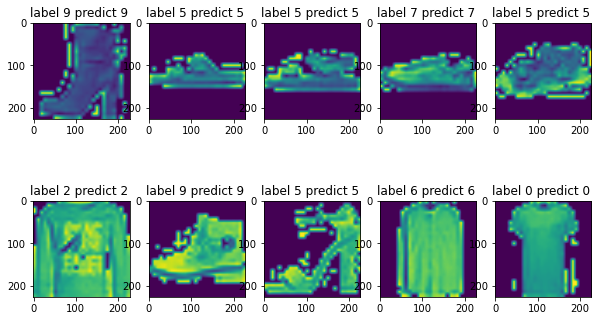

In [8]:
for X,y in test_iter:
    X,y=X.to(device),y.to(device)
    y_hat=net(X)
    predict_labels=torch.argmax(y_hat,dim=-1)
    X=X.cpu().permute(0,2,3,1)
    y=y.cpu()
    plot(X[30:],y[30:],predict_labels[30:],2,5)
    break
    
    